In [1]:
import sys, os
cwd = os.getcwd()
sys.path.append(cwd + '/../.') 

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from src.training_loop2 import SKLearnActiveLearner, KerasActiveLearner, Selection
from matplotlib import pyplot as plt

In [3]:
i = 0

In [4]:
def getXtrain(): return np.load('./../encodings/app_store_sbert_%s_X_train.npy' % i ).tolist()
def getytrain(): return np.load('./../encodings/app_store_sbert_%s_y_train.npy' % i).tolist()

In [5]:
X_train = getXtrain()
X_test = np.load('./../encodings/app_store_sbert_%s_X_test.npy' % i)
y_train = getytrain()
y_test = np.load('./../encodings/app_store_sbert_%s_y_test.npy' % i )

In [6]:
train_idx = [i for i in range(len(X_train))]

In [7]:
f1_list = []
precision_list = []
recall_list = []
c_list = []
times_train_list = []
times_inf_list = []
X_used_list = []
y_used_list = []

In [8]:
#al = SKLearnActiveLearner(10, getXtrain()[:20], getytrain()[:20], X_test[:20], y_test[:20], train_idx[:20], LogisticRegression, {'random_state':0, 'max_iter':1000}, selection = Selection.UNCERTAINTY)

In [9]:
al = SKLearnActiveLearner(10, getXtrain(), getytrain(), X_test, y_test, train_idx, LogisticRegression, {'random_state':0, 'max_iter':1000}, selection = Selection.ISLS_Density)

calc density ...


100%|██████████| 3196/3196 [00:06<00:00, 509.06it/s]


In [10]:
al.run_warmstart()

k-means seeding ...
#1  f1_mic: 0.60325, f1_mac: 0.25085, prec: -1, rec: -1, n: 10, c : [(2, 6), (1, 2), (0, 2)], t_train: 0.1382, t_inf: 0.0075


In [11]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

#2  f1_mic: 0.6214, f1_mac: 0.30489, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0109, t_inf: 0.0072
#3  f1_mic: 0.60357, f1_mac: 0.25182, prec: -1, rec: -1, n: 12, c : [(2, 7), (1, 3), (0, 2)], t_train: 0.0176, t_inf: 0.0105
#4  f1_mic: 0.6261, f1_mac: 0.31724, prec: -1, rec: -1, n: 13, c : [(2, 7), (1, 4), (0, 2)], t_train: 0.0171, t_inf: 0.0102
#5  f1_mic: 0.65801, f1_mac: 0.39434, prec: -1, rec: -1, n: 14, c : [(2, 7), (1, 5), (0, 2)], t_train: 0.0109, t_inf: 0.0072
#6  f1_mic: 0.68805, f1_mac: 0.45281, prec: -1, rec: -1, n: 15, c : [(2, 7), (1, 6), (0, 2)], t_train: 0.0105, t_inf: 0.0068
#7  f1_mic: 0.72153, f1_mac: 0.50435, prec: -1, rec: -1, n: 16, c : [(2, 7), (1, 7), (0, 2)], t_train: 0.0119, t_inf: 0.0073
#8  f1_mic: 0.70651, f1_mac: 0.48222, prec: -1, rec: -1, n: 17, c : [(2, 8), (1, 7), (0, 2)], t_train: 0.0116, t_inf: 0.0072
#9  f1_mic: 0.72747, f1_mac: 0.51169, prec: -1, rec: -1, n: 18, c : [(2, 8), (1, 8), (0, 2)], t_train: 0.0103, t_inf: 0.0065
#1

In [11]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

#2  f1_mic: 0.61421, f1_mac: 0.28511, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0099, t_inf: 0.0193
#3  f1_mic: 0.66834, f1_mac: 0.41825, prec: -1, rec: -1, n: 12, c : [(2, 6), (1, 4), (0, 2)], t_train: 0.0109, t_inf: 0.0075
#4  f1_mic: 0.63486, f1_mac: 0.34134, prec: -1, rec: -1, n: 13, c : [(2, 7), (1, 4), (0, 2)], t_train: 0.0099, t_inf: 0.0067
#5  f1_mic: 0.61358, f1_mac: 0.28332, prec: -1, rec: -1, n: 14, c : [(2, 8), (1, 4), (0, 2)], t_train: 0.0333, t_inf: 0.0066
#6  f1_mic: 0.65426, f1_mac: 0.38541, prec: -1, rec: -1, n: 15, c : [(2, 8), (1, 5), (0, 2)], t_train: 0.0095, t_inf: 0.0067
#7  f1_mic: 0.67866, f1_mac: 0.43622, prec: -1, rec: -1, n: 16, c : [(2, 8), (1, 6), (0, 2)], t_train: 0.0106, t_inf: 0.0068
#8  f1_mic: 0.71871, f1_mac: 0.50047, prec: -1, rec: -1, n: 17, c : [(2, 8), (1, 7), (0, 2)], t_train: 0.0116, t_inf: 0.0073
#9  f1_mic: 0.73874, f1_mac: 0.52831, prec: -1, rec: -1, n: 18, c : [(2, 8), (1, 8), (0, 2)], t_train: 0.0112, t_inf: 0.0068


In [11]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

#2  f1_mic: 0.61421, f1_mac: 0.28511, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0094, t_inf: 0.0242
#3  f1_mic: 0.66834, f1_mac: 0.41825, prec: -1, rec: -1, n: 12, c : [(2, 6), (1, 4), (0, 2)], t_train: 0.0105, t_inf: 0.0071
#4  f1_mic: 0.66834, f1_mac: 0.41962, prec: -1, rec: -1, n: 13, c : [(2, 6), (1, 4), (0, 3)], t_train: 0.0099, t_inf: 0.0071
#5  f1_mic: 0.66802, f1_mac: 0.42926, prec: -1, rec: -1, n: 14, c : [(2, 6), (1, 4), (0, 4)], t_train: 0.0108, t_inf: 0.007
#6  f1_mic: 0.62954, f1_mac: 0.33067, prec: -1, rec: -1, n: 15, c : [(2, 7), (1, 4), (0, 4)], t_train: 0.0385, t_inf: 0.0069
#7  f1_mic: 0.60951, f1_mac: 0.27187, prec: -1, rec: -1, n: 16, c : [(2, 8), (1, 4), (0, 4)], t_train: 0.0111, t_inf: 0.0126
#8  f1_mic: 0.63048, f1_mac: 0.33239, prec: -1, rec: -1, n: 17, c : [(2, 8), (1, 5), (0, 4)], t_train: 0.0104, t_inf: 0.0077
#9  f1_mic: 0.61765, f1_mac: 0.29544, prec: -1, rec: -1, n: 18, c : [(2, 9), (1, 5), (0, 4)], t_train: 0.0104, t_inf: 0.0069
#

In [11]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

#2  f1_mic: 0.6214, f1_mac: 0.30489, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0106, t_inf: 0.007
#3  f1_mic: 0.60357, f1_mac: 0.25182, prec: -1, rec: -1, n: 12, c : [(2, 7), (1, 3), (0, 2)], t_train: 0.0091, t_inf: 0.007
#4  f1_mic: 0.62422, f1_mac: 0.31234, prec: -1, rec: -1, n: 13, c : [(2, 7), (1, 4), (0, 2)], t_train: 0.0117, t_inf: 0.0072
#5  f1_mic: 0.60419, f1_mac: 0.25465, prec: -1, rec: -1, n: 14, c : [(2, 8), (1, 4), (0, 2)], t_train: 0.0107, t_inf: 0.0071
#6  f1_mic: 0.62829, f1_mac: 0.32282, prec: -1, rec: -1, n: 15, c : [(2, 8), (1, 5), (0, 2)], t_train: 0.0106, t_inf: 0.0259
#7  f1_mic: 0.65175, f1_mac: 0.3798, prec: -1, rec: -1, n: 16, c : [(2, 8), (1, 6), (0, 2)], t_train: 0.0115, t_inf: 0.0082
#8  f1_mic: 0.67397, f1_mac: 0.42739, prec: -1, rec: -1, n: 17, c : [(2, 8), (1, 7), (0, 2)], t_train: 0.0104, t_inf: 0.0069
#9  f1_mic: 0.69556, f1_mac: 0.46611, prec: -1, rec: -1, n: 18, c : [(2, 8), (1, 8), (0, 2)], t_train: 0.0112, t_inf: 0.0069
#10 

In [ ]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

In [ ]:
al.run_warmstart()

In [11]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#2  f1_mic: 0.6214, f1_mac: 0.30489, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0109, t_inf: 0.0078
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#3  f1_mic: 0.60357, f1_mac: 0.25182, prec: -1, rec: -1, n: 12, c : [(2, 7), (1, 3), (0, 2)], t_train: 0.0102, t_inf: 0.0066
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#4  f1_mic: 0.62422, f1_mac: 0.31234, prec: -1, rec: -1, n: 13, c : [(2, 7), (1, 4), (0, 2)], t_train: 0.0116, t_inf: 0.0073
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#5  f1_mic: 0.65269, f1_mac: 0.38344, prec: -1, rec: -1, n: 14, c : [(2, 7), (1, 5), (0, 2)], t_train: 0.0123, t_inf: 0.007
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#6  f1_mic: 0.68179, f1_mac: 0.44103, prec: -1, rec: -1, n: 15, c : [(2, 7), (1, 6), (0, 2)], t_train: 0.0112, t_inf: 0.0071
[0, 1, 2, 3, 4, 5, 6, 

In [11]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#2  f1_mic: 0.61421, f1_mac: 0.28511, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0094, t_inf: 0.0074
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#3  f1_mic: 0.66834, f1_mac: 0.41825, prec: -1, rec: -1, n: 12, c : [(2, 6), (1, 4), (0, 2)], t_train: 0.0097, t_inf: 0.0072
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#4  f1_mic: 0.66834, f1_mac: 0.41962, prec: -1, rec: -1, n: 13, c : [(2, 6), (1, 4), (0, 3)], t_train: 0.0092, t_inf: 0.0071
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#5  f1_mic: 0.66802, f1_mac: 0.42926, prec: -1, rec: -1, n: 14, c : [(2, 6), (1, 4), (0, 4)], t_train: 0.0371, t_inf: 0.0073
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#6  f1_mic: 0.62954, f1_mac: 0.33067, prec: -1, rec: -1, n: 15, c : [(2, 7), (1, 4), (0, 4)], t_train: 0.0102, t_inf: 0.0067
[0, 1, 2, 3, 4, 5, 6

In [11]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#2  f1_mic: 0.6214, f1_mac: 0.30489, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0108, t_inf: 0.0073
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#3  f1_mic: 0.60357, f1_mac: 0.25182, prec: -1, rec: -1, n: 12, c : [(2, 7), (1, 3), (0, 2)], t_train: 0.0318, t_inf: 0.0108
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#4  f1_mic: 0.62422, f1_mac: 0.31234, prec: -1, rec: -1, n: 13, c : [(2, 7), (1, 4), (0, 2)], t_train: 0.0121, t_inf: 0.0118
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#5  f1_mic: 0.65269, f1_mac: 0.38344, prec: -1, rec: -1, n: 14, c : [(2, 7), (1, 5), (0, 2)], t_train: 0.0104, t_inf: 0.0065
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
#6  f1_mic: 0.68179, f1_mac: 0.44103, prec: -1, rec: -1, n: 15, c : [(2, 7), (1, 6), (0, 2)], t_train: 0.0099, t_inf: 0.0072
[0, 1, 2, 3, 4, 5, 6,

In [10]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 1)

3 shuffle
[2943, 2421, 1939, 1856, 1732, 1458, 491, 489, 72, 34]
#2  f1_mic: 0.61421, f1_mac: 0.28511, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0091, t_inf: 0.0075
3 shuffle
[2943, 2421, 1939, 1856, 1732, 1458, 491, 489, 72, 34, 1886]
#3  f1_mic: 0.66834, f1_mac: 0.41825, prec: -1, rec: -1, n: 12, c : [(2, 6), (1, 4), (0, 2)], t_train: 0.0095, t_inf: 0.0068
3 shuffle
[2943, 2421, 1939, 1856, 1732, 1458, 491, 489, 72, 34, 1886, 2326]
#4  f1_mic: 0.66834, f1_mac: 0.41962, prec: -1, rec: -1, n: 13, c : [(2, 6), (1, 4), (0, 3)], t_train: 0.0103, t_inf: 0.007
3 shuffle
[2943, 2421, 1939, 1856, 1732, 1458, 491, 489, 72, 34, 1886, 2326, 2906]
#5  f1_mic: 0.66802, f1_mac: 0.42926, prec: -1, rec: -1, n: 14, c : [(2, 6), (1, 4), (0, 4)], t_train: 0.0103, t_inf: 0.007
3 shuffle
[2943, 2421, 1939, 1856, 1732, 1458, 491, 489, 72, 34, 1886, 2326, 2906, 2618]
#6  f1_mic: 0.62954, f1_mac: 0.33067, prec: -1, rec: -1, n: 15, c : [(2, 7), (1, 4), (0, 4)], t_train: 0.0101, t_inf:

In [10]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 10)
    
    # get selected data
    X_used, y_used = al.get_data_used(X_train, y_train)
    
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)
    c_list.append(c)
    times_train_list.append(times_train)
    times_inf_list.append(times_inf)
    X_used_list.append(X_used)
    y_used_list.append(y_used)

(3186,) 10
#2  f1_mic: 0.73029, f1_mac: 0.51603, prec: -1, rec: -1, n: 20, c : [(1, 10), (2, 9), (0, 1)], t_train: 0.0117, t_inf: 0.0126
(3176,) 20
#3  f1_mic: 0.70776, f1_mac: 0.50239, prec: -1, rec: -1, n: 30, c : [(1, 17), (2, 10), (0, 3)], t_train: 0.0122, t_inf: 0.0074
(3166,) 30
#4  f1_mic: 0.74593, f1_mac: 0.53438, prec: -1, rec: -1, n: 40, c : [(2, 20), (1, 17), (0, 3)], t_train: 0.017, t_inf: 0.0067
(3156,) 40
#5  f1_mic: 0.74656, f1_mac: 0.53294, prec: -1, rec: -1, n: 50, c : [(1, 24), (2, 23), (0, 3)], t_train: 0.0177, t_inf: 0.0068
(3146,) 50
#6  f1_mic: 0.74374, f1_mac: 0.52994, prec: -1, rec: -1, n: 60, c : [(2, 26), (1, 26), (0, 8)], t_train: 0.0183, t_inf: 0.0129
(3136,) 60
#7  f1_mic: 0.74937, f1_mac: 0.53506, prec: -1, rec: -1, n: 70, c : [(1, 31), (2, 28), (0, 11)], t_train: 0.0234, t_inf: 0.0074
(3126,) 70
#8  f1_mic: 0.75, f1_mac: 0.54136, prec: -1, rec: -1, n: 80, c : [(1, 33), (2, 31), (0, 16)], t_train: 0.0231, t_inf: 0.0074
(3116,) 80
#9  f1_mic: 0.75688, f1_ma

In [ ]:
for i in range(1):
    f1, _, precision, recall, c, times_train, times_inf = al.run_active_learning(30, 10)
    
    # get selected data
    X_used, y_used = al.get_data_used(X_train, y_train)
    
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)
    c_list.append(c)
    times_train_list.append(times_train)
    times_inf_list.append(times_inf)
    X_used_list.append(X_used)
    y_used_list.append(y_used)

In [ ]:
def np_flatten(x, dtype=None): return np.array(x, dtype=dtype)

In [12]:
f1 = np_flatten(f1)
f1_list = np_flatten(f1_list)
precision_list = np_flatten(precision_list)
recall_list = np_flatten(recall_list)
c_list = np_flatten(c_list)
times_train_list = np_flatten(times_train_list)
times_inf_list = np_flatten(times_inf_list)
X_used_list = np_flatten(X_used_list, dtype=object)
y_used_list = np_flatten(y_used_list, dtype=object)

In [12]:
[ 5, 6][-5:]

[5, 6]

In [7]:
f1, precision, recall, c, times_train, times_inf = al.run_active_learning(100, 10)

#2  f1: 0.25635, prec: 0.9186, rec: 0.14896, n: 30, c : [(0, 17), (1, 13)], t_train: 0.0162, t_inf: 0.0582
#3  f1: 0.72185, prec: 0.80845, rec: 0.652, n: 40, c : [(0, 20), (1, 20)], t_train: 0.0071, t_inf: 0.0573
#4  f1: 0.76031, prec: 0.64249, rec: 0.93104, n: 50, c : [(1, 28), (0, 22)], t_train: 0.0635, t_inf: 0.1083
#5  f1: 0.8182, prec: 0.80582, rec: 0.83096, n: 60, c : [(1, 31), (0, 29)], t_train: 0.0092, t_inf: 0.0973
#6  f1: 0.82212, prec: 0.81255, rec: 0.83192, n: 70, c : [(1, 36), (0, 34)], t_train: 0.0079, t_inf: 0.0898
#7  f1: 0.81188, prec: 0.84656, rec: 0.77992, n: 80, c : [(0, 40), (1, 40)], t_train: 0.0083, t_inf: 0.0907
#8  f1: 0.82921, prec: 0.824, rec: 0.83448, n: 90, c : [(1, 46), (0, 44)], t_train: 0.0094, t_inf: 0.0833
#9  f1: 0.83081, prec: 0.79228, rec: 0.87328, n: 100, c : [(1, 52), (0, 48)], t_train: 0.0107, t_inf: 0.0789
#10  f1: 0.8374, prec: 0.82578, rec: 0.84936, n: 110, c : [(1, 56), (0, 54)], t_train: 0.0103, t_inf: 0.0907
#11  f1: 0.83112, prec: 0.84621,

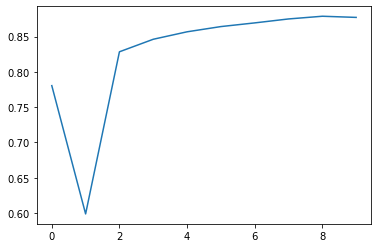

In [13]:
plt.plot(f1)

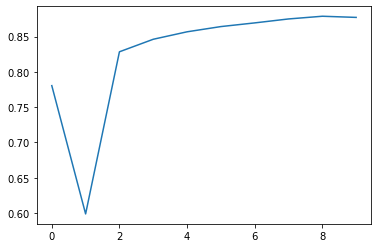

In [14]:
plt.plot(f1)

In [16]:
# check data used
X_pool = np.load('./../encodings/imdb_sbert_0_X_train.npy').tolist()
y_pool = np.load('./../encodings/imdb_sbert_0_y_train.npy').tolist()

X_used, y_used = al.get_data_used(X_pool, y_pool)
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_used, y_used)
proba = clf.predict_proba(X_test)
y_pred = proba.argmax(axis=1)
from sklearn.metrics import f1_score, recall_score, precision_score
round(f1_score(y_test, y_pred), 5),round(precision_score(y_test, y_pred), 5),round(recall_score(y_test, y_pred), 5)

(0.87731, 0.87425, 0.8804)

In [112]:
from scipy.stats import entropy as entropy2

def least_confidence(proba):
    return 1 - np.array(proba).max(axis=1)

def entropy(proba, base=2):
    return entropy2(proba, base=2, axis=1)

def smallest_margin(probs):
    part = np.partition(-probs, 1, axis=1)
    margin = part[:, 0] - part[:, 1]
    return margin
    
def random(probs):
    return np.random.rand(len(probs))
    

In [92]:
import numpy as np
preds = np.array([[0.1 , 0.85, 0.05],
                  [0.6 , 0.3 , 0.1 ],
                  [0.39, 0.61, 0.0 ]])

In [107]:
a = [0.6 , 0.3 , 0.1 ]



-np.sum(a*np.log2(a))

1.295461844238322

In [93]:
least_confidence(preds)

array([0.15, 0.4 , 0.39])

In [119]:
random(preds)

array([0.93445607, 0.61198403, 0.69323097])

In [120]:
smallest_margin(preds)

array([-0.75, -0.3 , -0.22])

In [65]:
preds.sort(axis=1)
preds

array([[0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.25, 0.75],
       [0.3 , 0.33, 0.33]])

In [66]:
preds[:, -1] - preds[:, -2]

array([0. , 1. , 1. , 0.5, 0. ])

In [ ]:
probs_sorted[:, 0] - probs_sorted[:,1]

In [1]:
import sys, os
cwd = os.getcwd()
sys.path.append(cwd + '/../.') 

In [2]:
from src.EvaluationLoop import EvaluationLoop

In [3]:
save_dir = './app_store_sbert_tmp'
dataset = 'app_store'
encoding = 'sbert'
sample_size_per_step = 1
al_steps = 30
save_and_repeat = 1

In [4]:
el = EvaluationLoop(save_dir, dataset, encoding, sample_size_per_step, al_steps, save_and_repeat)

Save directory:  ./app_store_sbert_tmp_1_30_1


In [5]:
el.run()

Start model 0 ...
k-means seeding ...
#1  f1_mic: 0.60325, f1_mac: 0.25085, prec: -1, rec: -1, n: 10, c : [(2, 6), (1, 2), (0, 2)], t_train: 0.0186, t_inf: 0.0622
__ End Warmstart
#2  f1_mic: 0.61421, f1_mac: 0.28511, prec: -1, rec: -1, n: 11, c : [(2, 6), (1, 3), (0, 2)], t_train: 0.0221, t_inf: 0.0072
#3  f1_mic: 0.66834, f1_mac: 0.41825, prec: -1, rec: -1, n: 12, c : [(2, 6), (1, 4), (0, 2)], t_train: 0.0322, t_inf: 0.0073
#4  f1_mic: 0.66834, f1_mac: 0.41962, prec: -1, rec: -1, n: 13, c : [(2, 6), (1, 4), (0, 3)], t_train: 0.008, t_inf: 0.0069
#5  f1_mic: 0.66802, f1_mac: 0.42926, prec: -1, rec: -1, n: 14, c : [(2, 6), (1, 4), (0, 4)], t_train: 0.0083, t_inf: 0.0068
#6  f1_mic: 0.62954, f1_mac: 0.33067, prec: -1, rec: -1, n: 15, c : [(2, 7), (1, 4), (0, 4)], t_train: 0.0101, t_inf: 0.0072
#7  f1_mic: 0.60951, f1_mac: 0.27187, prec: -1, rec: -1, n: 16, c : [(2, 8), (1, 4), (0, 4)], t_train: 0.0287, t_inf: 0.007
#8  f1_mic: 0.63048, f1_mac: 0.33239, prec: -1, rec: -1, n: 17, c : [(2,

In [8]:
    classes = [1, 2, 3]
    y_pool = [1, 1, 1, 2, 1, 1, 3]

    for c in classes:
        for i in range(len(y_pool)):
            if y_pool[i] == c:
                print(i)
                break;   

0
3
6


In [9]:
[1, 2, 3] + [1, 2]

[1, 2, 3, 1, 2]